In [104]:
import pandas_datareader as pdr
import datetime
import numpy as np
from matplotlib import pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import pandas as pd
import talib

In [2]:
py.init_notebook_mode(connected=True)

In [3]:
vale3 = pdr.get_data_yahoo('VALE3.SA', start=datetime.datetime(2016,10,1), end=datetime.datetime(2019,1,1))

In [4]:
vale3.tail() #tail para ver as ultimas linhas

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-20,51.169998,49.450001,50.740002,49.810001,25323700.0,46.577148
2018-12-21,51.250000,50.220001,50.279999,50.860001,28272600.0,47.558998
2018-12-26,50.700001,49.400002,50.110001,50.439999,13356400.0,47.166256
2018-12-27,50.389999,49.279999,50.099998,49.500000,14332000.0,46.287266
2018-12-28,51.200001,50.250000,50.310001,51.000000,11914300.0,47.689915


In [5]:
vale3.describe()

,High,Low,Open,Close,Volume,Adj Close
count,560.000000,560.000000,560.000000,560.000000,5.600000e+02,560.000000
mean,39.261393,38.158054,38.714214,38.709214,1.337664e+07,34.870363
std,11.180888,10.950990,11.092145,11.061257,8.200185e+06,10.848663
min,17.950001,17.559999,17.840000,17.650000,0.000000e+00,15.098832
25%,30.165000,29.204999,29.667500,29.642500,6.290675e+06,25.807527
50%,35.645000,34.650000,35.195000,35.170000,1.301110e+07,31.197265
75%,50.424998,49.052500,49.692499,49.624999,1.879945e+07,45.172268
max,62.419998,60.480000,62.200001,62.200001,5.642970e+07,58.162994


In [6]:
vale3.index

DatetimeIndex(['2016-10-03', '2016-10-04', '2016-10-05', '2016-10-06',
               '2016-10-07', '2016-10-10', '2016-10-11', '2016-10-13',
               '2016-10-14', '2016-10-17',
               ...
               '2018-12-13', '2018-12-14', '2018-12-17', '2018-12-18',
               '2018-12-19', '2018-12-20', '2018-12-21', '2018-12-26',
               '2018-12-27', '2018-12-28'],
              dtype='datetime64[ns]', name='Date', length=560, freq=None)

In [7]:
vale3.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [8]:
vale3['2018-01-01':].head(10) #exibindo as 10 primeiras linhas a partir do index temporal

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,41.740002,40.439999,40.439999,41.720001,14156500.0,37.493317
2018-01-03,41.880001,41.299999,41.830002,41.470001,12744200.0,37.268646
2018-01-04,42.369999,41.520000,41.810001,41.639999,18433000.0,37.421425
2018-01-05,42.290001,41.310001,41.570000,42.290001,15251300.0,38.005573
2018-01-08,43.230000,42.400002,42.400002,43.230000,14542800.0,38.850338
2018-01-09,43.750000,42.930000,43.580002,43.070000,15986200.0,38.706551
2018-01-10,42.950001,42.419998,42.740002,42.470001,12149500.0,38.167339
2018-01-11,43.299999,42.599998,42.599998,43.299999,10236300.0,38.913250
2018-01-12,43.660000,42.750000,42.950001,43.549999,15014300.0,39.137920


In [9]:
vale3['Close'] / vale3['Open']

Date
2016-10-03    1.014006
2016-10-04    0.969780
2016-10-05    0.998882
2016-10-06    0.997758
2016-10-07    1.001669
                ...   
2018-12-20    0.981671
2018-12-21    1.011535
2018-12-26    1.006585
2018-12-27    0.988024
2018-12-28    1.013715
Length: 560, dtype: float64

In [10]:
percentual = (vale3.Close / vale3.Open).apply(lambda x: x-1)*100 #pegando os percentuais

In [11]:
percentual.head()

Date
2016-10-03    1.400560
2016-10-04   -3.021984
2016-10-05   -0.111849
2016-10-06   -0.224220
2016-10-07    0.166949
dtype: float64

In [12]:
daily_log_returns = np.log(vale3.Close.pct_change()+1) #np.log para pegar o logaritimo natural de um numero e pct_change para ver a variação percentual entre o elemento atual e o anterior

In [13]:
daily_log_returns

Date
2016-10-03         NaN
2016-10-04   -0.025176
2016-10-05    0.011828
2016-10-06   -0.003365
2016-10-07    0.011173
                ...   
2018-12-20   -0.004007
2018-12-21    0.020861
2018-12-26   -0.008292
2018-12-27   -0.018812
2018-12-28    0.029853
Name: Close, Length: 560, dtype: float64

In [14]:
def simple_config_plot(fig, title):
    title={'text': title, 
          'xanchor':'center',
          'yanchor': 'bottom',
          'y':0, 'x':0.5}
    fig.update_layout(title=title, xaxis_rangeslider_visible=False, width=960, height=500,
                     xaxis_showgrid=True, xaxis_gridwidth=1, xaxis_gridcolor='#E8E8E8',
                     yaxis_showgrid=True, yaxis_gridwidth=1, yaxis_gridcolor='#E8E8E8',
                     plot_bgcolor='rgba(0,0,0,0)')

In [15]:
def simple_plot(data, title):
    fig = go.Figure(data=data)
    simple_config_plot(fig, title)
    fig.show()

In [16]:
data=[go.Histogram(x=daily_log_returns)]

In [17]:
simple_plot(data, "1.1 VALE3.SA Histograma")

#### Baixando diversas ações no yahoo e agrupando por ação

In [18]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas=map(data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

In [19]:
tickers = ['AAPL', 'MSFT', '^GSPC']
startdate = datetime.datetime(2016,1,1)
enddate = datetime.datetime(2018,12,31)

In [20]:
all_data = get(tickers, startdate, enddate)

In [21]:
all_data.head()

High        Low       Open      Close       Volume  \
Ticker Date                                                                  
AAPL   2016-01-04  26.342501  25.500000  25.652500  26.337500  270597600.0   
       2016-01-05  26.462500  25.602501  26.437500  25.677500  223164000.0   
       2016-01-06  25.592501  24.967501  25.139999  25.174999  273829600.0   
       2016-01-07  25.032499  24.107500  24.670000  24.112499  324377600.0   
       2016-01-08  24.777500  24.190001  24.637501  24.240000  283192000.0   

                   Adj Close  
Ticker Date                   
AAPL   2016-01-04  24.400942  
       2016-01-05  23.789471  
       2016-01-06  23.323915  
       2016-01-07  22.339539  
       2016-01-08  22.457672

#### Avaliando ganho por carteira

In [22]:
#transform rows into columns
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

In [23]:
daily_close_px

Ticker,AAPL,MSFT,^GSPC
Date,,,
2016-01-04,24.400942,50.006744,2012.660034
2016-01-05,23.789471,50.234879,2016.709961
2016-01-06,23.323915,49.322346,1990.260010
2016-01-07,22.339539,47.606789,1943.089966
2016-01-08,22.457672,47.752792,1922.030029
...,...,...,...
2018-12-24,35.854492,91.786125,2351.100098
2018-12-26,38.379425,98.056015,2467.699951
2018-12-27,38.130344,98.660576,2488.830078


In [24]:
#get the actual price and divide by previous price to find the price variation - equivalente ao pct_change
cart_pct_change = daily_close_px / daily_close_px.shift(1)-1

In [25]:
cart_pct_change

Ticker,AAPL,MSFT,^GSPC
Date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,-0.025059,0.004562,0.002012
2016-01-06,-0.019570,-0.018165,-0.013115
2016-01-07,-0.042205,-0.034783,-0.023700
2016-01-08,0.005288,0.003067,-0.010838
...,...,...,...
2018-12-24,-0.025874,-0.041739,-0.027112
2018-12-26,0.070422,0.068310,0.049594
2018-12-27,-0.006490,0.006165,0.008563


In [26]:
#verificando o valor acumulado diariamente
#summ all prices variation percentages
cart_return = (1 + cart_pct_change).cumprod()

In [27]:
cart_return

Ticker,AAPL,MSFT,^GSPC
Date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,0.974941,1.004562,1.002012
2016-01-06,0.955861,0.986314,0.988870
2016-01-07,0.915520,0.952007,0.965434
2016-01-08,0.920361,0.954927,0.954970
...,...,...,...
2018-12-24,1.469390,1.835475,1.168156
2018-12-26,1.572867,1.960856,1.226089
2018-12-27,1.562659,1.972945,1.236587


In [28]:
#verificando o rendimento final de uma carteira
#percentual changes
final_return = cart_return[-1:].apply(lambda x:(x-1)*100)

In [29]:
final_return

Ticker,AAPL,MSFT,^GSPC
Date,,,
2018-12-31,57.85707,98.055011,24.554075


### Plotando os candlesticks

In [30]:
trace = go.Candlestick(x=all_data.loc['MSFT'].index,
                      open=all_data.loc['MSFT'].Open,
                      high=all_data.loc['MSFT'].High,
                      low=all_data.loc['MSFT'].Low,
                      close=all_data.loc['MSFT'].Close)
data = [trace]

simple_plot(data, "1.2 Candlestick plot")

### Preparação de dados

In [31]:
# rearrange data - reorganizando o dataset
data = all_data.reset_index()
data = data.set_index(['Date', 'Ticker']).sort_index()

In [32]:
# Getting just the adjusted closing prices. This will return a Pandas DataFrame
# The index in this DataFram is the major index of the panel_data
close = data['Close']

In [33]:
# Getting all weekdays between 01/01/2000 e 31/12/2018
all_weekdays = pd.date_range(start=startdate, end=enddate, freq='B')

In [34]:
# How do we align the existing prices in adj_close with our new set of dates?
#All we need to do is reindex close using all_weekdays as the new index
close = close.reindex(pd.MultiIndex.from_product([all_weekdays, tickers], names=['Date', 'Ticker']),
                     fill_value=np.NaN)

In [35]:
close = close.reset_index().pivot(index='Date', columns='Ticker', values='Close')

In [36]:
close.head(10)

Ticker,AAPL,MSFT,^GSPC
Date,,,
2016-01-01,NaN,NaN,NaN
2016-01-04,26.337500,54.799999,2012.660034
2016-01-05,25.677500,55.049999,2016.709961
2016-01-06,25.174999,54.049999,1990.260010
2016-01-07,24.112499,52.169998,1943.089966
2016-01-08,24.240000,52.330002,1922.030029
2016-01-11,24.632500,52.299999,1923.670044
2016-01-12,24.990000,52.779999,1938.680054
2016-01-13,24.347500,51.639999,1890.280029


In [37]:
close.describe()

Ticker,AAPL,MSFT,^GSPC
count,754.000000,754.000000,754.000000
mean,37.002964,76.064814,2429.535875
std,9.438763,20.005622,286.074202
min,22.584999,48.430000,1829.079956
25%,27.744375,57.902499,2169.075012
50%,37.997499,71.010002,2434.145020
75%,43.664374,93.904999,2690.084961
max,58.017502,115.610001,2930.750000


In [38]:
#calculando valor percentual com pct_change
data = all_data.pct_change(1)

In [39]:
data.loc['MSFT'].Close.head()

Date
2016-01-04    0.389628
2016-01-05    0.004562
2016-01-06   -0.018165
2016-01-07   -0.034783
2016-01-08    0.003067
Name: Close, dtype: float64

In [40]:
#Aplicando o logaritmo no valor do nº e depois calculando a diferença através da função diff, que calcula a diferença ao longo de uma lista
log_returns = np.log(close.dropna()).diff()
log_returns.head()

Ticker,AAPL,MSFT,^GSPC
Date,,,
2016-01-04,NaN,NaN,NaN
2016-01-05,-0.025379,0.004552,0.002010
2016-01-06,-0.019764,-0.018332,-0.013202
2016-01-07,-0.043121,-0.035402,-0.023986
2016-01-08,0.005274,0.003062,-0.010898


In [41]:
axis = []
for d in log_returns:
    axi = go.Scatter(
    x = log_returns.index,
    y = log_returns[d].cumsum(),
    name = d,
    opacity =1)
    axis.append(axi)

In [42]:
simple_plot(axis, title='1.3 Cumulative log returns')

In [43]:
axis = []

In [44]:
for d in log_returns:
    axi = go.Scatter(
    x = log_returns.index,
    y = 100 * (np.exp(log_returns[d].cumsum())-1),
    name = d,
    opacity = 1)
    axis.append(axi)

In [45]:
simple_plot(axis, "1.4 Total relative returns (%)")

In [46]:
#calculando o rendimento do ultimo dia numa carteira, começa-se transpondo a matriz de preços
r_t = log_returns.tail(1).transpose()
r_t

Date,2018-12-31
Ticker,
AAPL,0.009619
MSFT,0.011686
^GSPC,0.008457


In [47]:
#criando matriz de pesos
weihts_vector = pd.DataFrame(1/3, index=r_t.index, columns=r_t.columns)
weihts_vector

Date,2018-12-31
Ticker,
AAPL,0.333333
MSFT,0.333333
^GSPC,0.333333


In [48]:
#realizando a multiplicação e obtendo o retorno do dia de uma carteira de ações
portfolio_log_return = weihts_vector.transpose().dot(r_t)
portfolio_log_return

Date,2018-12-31
Date,
2018-12-31,0.00992


In [49]:
#calculando todo o período, valor é obtido na diagonal da matriz através da função diag do numpy
weihts_matriz = pd.DataFrame(1/3, index=log_returns.index, columns=log_returns.columns)
weihts_matriz

Ticker,AAPL,MSFT,^GSPC
Date,,,
2016-01-04,0.333333,0.333333,0.333333
2016-01-05,0.333333,0.333333,0.333333
2016-01-06,0.333333,0.333333,0.333333
2016-01-07,0.333333,0.333333,0.333333
2016-01-08,0.333333,0.333333,0.333333
...,...,...,...
2018-12-24,0.333333,0.333333,0.333333
2018-12-26,0.333333,0.333333,0.333333
2018-12-27,0.333333,0.333333,0.333333


In [50]:
temp_var = weihts_matriz.dot(log_returns.transpose())
temp_var.tail()

Date,2016-01-04,2016-01-05,2016-01-06,2016-01-07,2016-01-08,2016-01-11,2016-01-12,2016-01-13,2016-01-14,2016-01-15,...,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-24,2018-12-26,2018-12-27,2018-12-28,2018-12-31
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-24,NaN,-0.006272,-0.017099,-0.03417,-0.000854,0.005447,0.010439,-0.024388,0.022087,-0.02896,...,-0.020135,0.007812,-0.016634,-0.020902,-0.031107,-0.032112,0.060844,0.002721,-0.002856,0.00992
2018-12-26,NaN,-0.006272,-0.017099,-0.03417,-0.000854,0.005447,0.010439,-0.024388,0.022087,-0.02896,...,-0.020135,0.007812,-0.016634,-0.020902,-0.031107,-0.032112,0.060844,0.002721,-0.002856,0.00992
2018-12-27,NaN,-0.006272,-0.017099,-0.03417,-0.000854,0.005447,0.010439,-0.024388,0.022087,-0.02896,...,-0.020135,0.007812,-0.016634,-0.020902,-0.031107,-0.032112,0.060844,0.002721,-0.002856,0.00992
2018-12-28,NaN,-0.006272,-0.017099,-0.03417,-0.000854,0.005447,0.010439,-0.024388,0.022087,-0.02896,...,-0.020135,0.007812,-0.016634,-0.020902,-0.031107,-0.032112,0.060844,0.002721,-0.002856,0.00992
2018-12-31,NaN,-0.006272,-0.017099,-0.03417,-0.000854,0.005447,0.010439,-0.024388,0.022087,-0.02896,...,-0.020135,0.007812,-0.016634,-0.020902,-0.031107,-0.032112,0.060844,0.002721,-0.002856,0.00992


In [51]:
portfolio_log_return = pd.Series(np.diag(temp_var), index=log_returns.index)
portfolio_log_return =portfolio_log_return[1:]
portfolio_log_return.tail()

Date
2018-12-24   -0.032112
2018-12-26    0.060844
2018-12-27    0.002721
2018-12-28   -0.002856
2018-12-31    0.009920
dtype: float64

In [52]:
#plotando no gráfico
axis = go.Scatter(
x = portfolio_log_return.index,
y = portfolio_log_return.cumsum(),
opacity = 1)

In [53]:
simple_plot(axis, "2.1 Portfolio cumulative log returns")

In [54]:
#gráfico relativo total
total_relative_returns = (np.exp(portfolio_log_return.cumsum())-1)

In [55]:
axis = go.Scatter(
x = total_relative_returns.index,
y = total_relative_returns * 100,
opacity = 1)

In [56]:
simple_plot(axis, "2.2 Portifolio total relative returns (%)")

### Médias móveis

In [57]:
#Para isso é necessário unir as classes Candlestick e Scatter
# Get the MSFT timeseries. This now returns a Pandas Series object indexed by date and drop NA rows
msft = all_data.loc['MSFT'].dropna()

In [58]:
msft = msft['2018-06-01':]

In [59]:
window = 21
#calculate the 21 days moving avarage of the closing prices
MA = msft.Close.rolling(window=window).mean()

In [60]:
trace_avg = go.Scatter(
x = MA.index,
y = MA,
name = 'MSFT MA(21)',
line = dict(color = '#72ac00'),
opacity = 1)

In [61]:
trace_candles = go.Candlestick(
x = msft.index,
open = msft.Open,
high = msft.High,
low = msft.Low,
close = msft.Close,
name = 'Price')

In [62]:
data = [trace_avg, trace_candles]

In [63]:
simple_plot(data, '3.1 Simple moving average')

### Média móvel exponencial

In [64]:
#Calculando fator K
window = 21

In [65]:
K = (2 / (window + 1))
msft = all_data.loc['MSFT'].dropna()
msft = msft['2018-06-01':]

In [66]:
MA = msft.Close.dropna().rolling(window=window).mean()

In [67]:
#criando dataframe de apoio
ema_data = pd.DataFrame(index=MA.index)
ema_data['Price'] = msft.Close
ema_data['MA'] = MA
ema_data['EMA'] = np.NaN

In [68]:
#implementando equação
ema_data.EMA[0] = ema_data.MA[1]

In [69]:
for i in range(1, len(ema_data)):
    ema_data.EMA[i] = (ema_data.Price[i] * K) + ((1 - K) * ema_data.EMA[i-1])

In [70]:
#plotando no gráfico
trace_ma = go.Scatter(
x = MA.index,
y = MA,
name = 'MSFT MA (21)',
line = dict(color = '#BEBECF'),
opacity = 1)

In [71]:
trace_ema = go.Scatter(
x = ema_data.index,
y = ema_data.MA,
name = 'MSFT EMA (21)',
line = dict(color = '#17BECF'),
opacity = 1)

In [72]:
trace_candles = go.Candlestick(
x = msft.index,
open = msft.Open,
high = msft.High,
low = msft.Low,
close = msft.Close,
name = 'Price')

In [73]:
data = [trace_avg, trace_ema, trace_candles]

In [74]:
#rever algoritmo de média móvel exponencial, preenchimento da linha esta incorreto

simple_plot(data, '3.2 Exponential moving average')

### Cruzamento de médias móveis

In [75]:
# Calculate the 9 and 21 days moving avareges of the closing prices
short_rolling_msft = msft['2018-01-01':].Close.rolling(window=9).mean()
long_rolling_msft = msft['2018-01-01':].Close.rolling(window=21).mean()

In [76]:
trace_short = go.Scatter(
x=short_rolling_msft.index,
y=short_rolling_msft,
name='MSFT Short',
line=dict(color='#17BECF'),
opacity=1)

In [77]:
trace_long = go.Scatter(
x=long_rolling_msft.index,
y=long_rolling_msft,
name='MSFT Long',
line=dict(color='#7F7F7F'),
opacity=1)

In [78]:
trace_price = go.Candlestick(
x=msft['2018-01-01':].index,
open=msft['2018-01-01':].Open,
high=msft['2018-01-01':].High,
low=msft['2018-01-01':].Low,
close=msft['2018-01-01':].Close,
name='Price')

In [79]:
data = [trace_short, trace_long, trace_price]

In [80]:
simple_plot(data, '3.3 Moving average crossover')

### MACD 
#### Convergência-Divergência da Média Móvel

In [81]:
#função para calcular média móvel exponencial
def get_ema(window, prices):
    K = (2 / (window +1))
    ma = prices.rolling(window=window).mean().dropna()
    data = pd.DataFrame(index=ma.index)
    data['Price'] = prices
    data['EMA'] = np.NaN
    data.EMA[0] = ma[1]
    for i in range(1, len(data)):
        data.EMA[i] = (data.Price[i] * K) + ((1 - K) * data.EMA[i-1])
        return data

In [82]:
msft = all_data.loc['MSFT'].dropna()
msft = msft['2018-06-01':]

In [83]:
mm_12 = get_ema(12, msft.Close)
mm_26 = get_ema(26, msft.Close)

In [84]:
mm_macd = mm_12.EMA - mm_26.EMA

In [85]:
mm_signal = get_ema(9, msft.Close)

In [86]:
from plotly import tools

In [87]:
msft = msft[mm_signal.index[0]:]

In [88]:
trace_macd = go.Scatter(
x=mm_macd.index,
y=mm_macd,
name='MACD',
line=dict(color='#17BECF'),
opacity=1)

In [89]:
trace_signal = go.Scatter(
x=mm_signal.index,
y=mm_signal,
name='Signal',
line=dict(color='#B22222'),
opacity=1)

In [90]:
trace_candles = go.Candlestick(
x = msft.index,
open = msft.Open,
high = msft.High,
low = msft.Low,
close = msft.Close,
name = 'Price')

In [91]:
fig = tools.make_subplots(rows=2, cols=1)

/home/dagoberto/anaconda3/lib/python3.8/site-packages/plotly/tools.py:461: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



In [92]:
#fig = plt.subplots.make_subplots(rows=2, cols=1)

In [93]:
fig.append_trace(trace_candles, 1, 1)
fig.append_trace(trace_macd, 2, 1)
fig.append_trace(trace_signal, 2, 1)

In [94]:
fig['layout']['yaxis2'].update(range=[-3,5])

layout.YAxis({
    'anchor': 'x2', 'domain': [0.0, 0.425], 'range': [-3, 5]
})

In [95]:
simple_plot(fig, '4.1 MACD')

### Índice de Força Relativa IFR (RSI)

In [96]:
window = 14

In [97]:
aapl = all_data.loc['AAPL'].dropna()

In [98]:
aapl = aapl['2018-06-01':'2019-02-22']

In [108]:
rsi = talib.RSI (aapl["Close"])

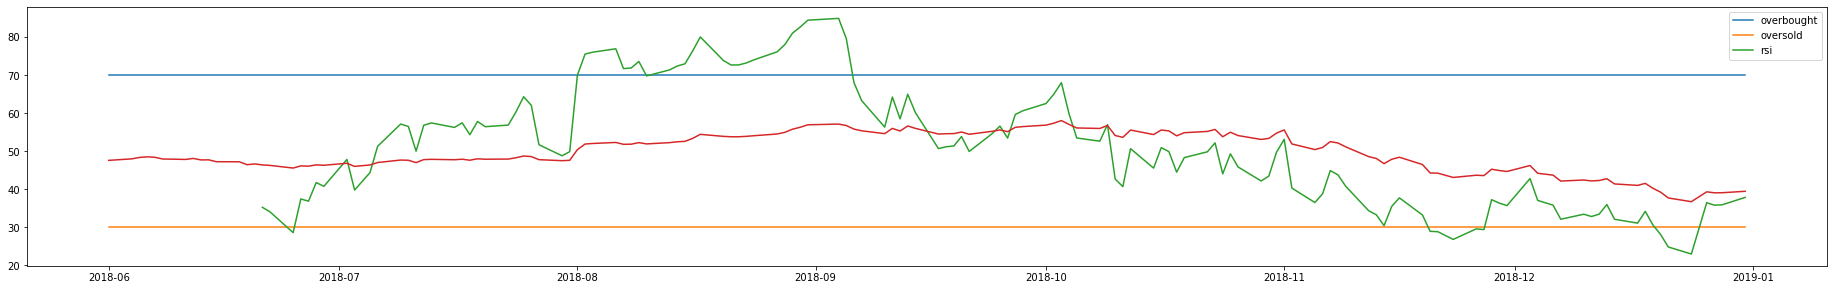

In [107]:
fig = plt.figure()
fig.set_size_inches((25,18))
ax_rsi = fig.add_axes((0, 0.24, 1, 0.2))
ax_rsi.plot(aapl.index, [70] * len(aapl.index), label='overbought')
ax_rsi.plot(aapl.index, [30] * len(aapl.index), label='oversold')
ax_rsi.plot(aapl.index, rsi, label='rsi')
ax_rsi.plot(aapl['Close'])
ax_rsi.legend()

Este script registra as seções em que cada ponto se enquadra. Ele está na região sobrecomprada, sobrevendida ou Nenhum, que se refere ao ponto entre as duas linhas.

In [109]:
section = None
sections = []
for i in range(len(rsi)): 
    if rsi[i] < 30:
        section = 'oversold'
    elif rsi[i] > 70:
        section = 'overbought'
    else:
        section = None
    sections.append(section)

Este script integra a estratégia básica para negociação RSI. A estratégia de negociação é quando o valor deixa as seções de sobrecompra e sobrevenda, ele faz a negociação apropriada. Por exemplo, se ele deixar a seção de sobrevenda, uma negociação de compra é feita. Se ele deixar a seção de sobrecompra, uma negociação de venda é feita.

In [110]:
trades = []
for i in range(1,len(sections)):
    trade = None
    if sections[i-1] == 'oversold' and sections[i] == None:
        trade = True
    if sections[i-1] == 'overbought' and sections[i] == None:
        trade = False
    trades.append(trade)

Este script usa as negociações feitas pelo programa para calcular o lucro ou a perda de cada negociação. Isso dá a melhor avaliação do programa, pois visa exatamente a variável a ser procurada. A variável qty calcula quantas ações são compradas.

In [112]:
acp = aapl['Close'][len(aapl['Close'])-len(trades):].values
profit = 0
qty = 10
for i in range(len(acp)-1):
    true_trade = None
    if acp[i] < acp[i+1]:
        true_trade = True
    elif acp[i] > acp[i+1]:
        true_trade = False
    if trades[i] == true_trade:
        profit += abs(acp[i+1] - acp[i]) * qty
    elif trades[i] != true_trade:
        profit += -abs(acp[i+1] - acp[i]) * qty

Lucro

In [114]:
profit

-994.1249847412109